## Python statistics essential training - 03_07_proportions

Standard imports

In [2]:
import numpy as np
import scipy.stats
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [4]:
import re
import mailbox
import csv

In [5]:
smoking = pd.read_csv('whickham.csv')

In [6]:
smoking['ageGroup'] = pd.cut(smoking.age,[0,30,40,53,64],labels=['0-30','30-40','40-53','53-64'])

In [7]:
bysmoker = smoking.groupby("smoker").outcome.value_counts(normalize=True)

In [9]:
byage = smoking.groupby(['ageGroup','smoker']).outcome.value_counts(normalize=True)

In [10]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [11]:
byage

ageGroup  smoker  outcome
0-30      No      Alive      0.981818
                  Dead       0.018182
          Yes     Alive      0.975610
                  Dead       0.024390
30-40     No      Alive      0.955224
                  Dead       0.044776
          Yes     Alive      0.940678
                  Dead       0.059322
40-53     No      Alive      0.876106
                  Dead       0.123894
          Yes     Alive      0.802395
                  Dead       0.197605
53-64     No      Alive      0.669291
                  Dead       0.330709
          Yes     Alive      0.580645
                  Dead       0.419355
Name: outcome, dtype: float64

Text(0.5, 1.0, 'smoker')

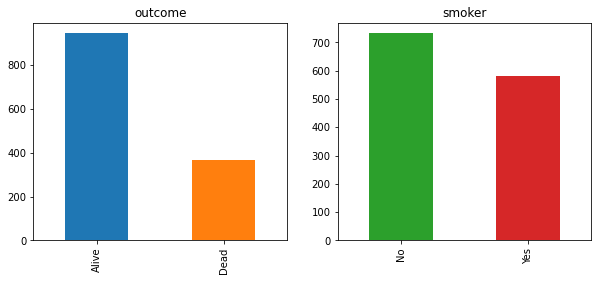

In [16]:
pp.figure(figsize=(10,4))
pp.subplot(1,2,1); smoking.outcome.value_counts().plot(kind='bar',color=['C0','C1']); pp.title('outcome')
pp.subplot(1,2,2); smoking.smoker.value_counts().plot(kind='bar',color=['C2','C3']); pp.title('smoker')

Text(0.5, 1.0, 'smoker')

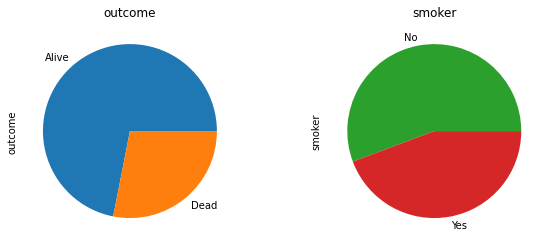

In [14]:
pp.figure(figsize=(10,4))
pp.subplot(1,2,1); smoking.outcome.value_counts().plot(kind='pie',colors=['C0','C1']); pp.title('outcome')
pp.subplot(1,2,2); smoking.smoker.value_counts().plot(kind='pie',colors=['C2','C3']); pp.title('smoker')

In [17]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

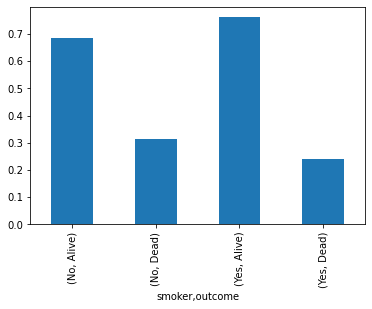

In [18]:
bysmoker.plot(kind='bar')

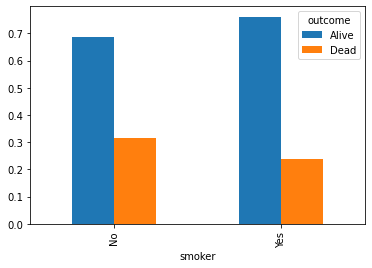

In [20]:
bysmoker.unstack().plot(kind='bar',stacked=False)

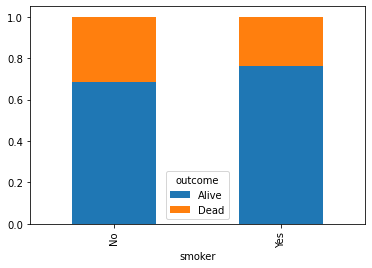

In [19]:
bysmoker.unstack().plot(kind='bar',stacked=True)

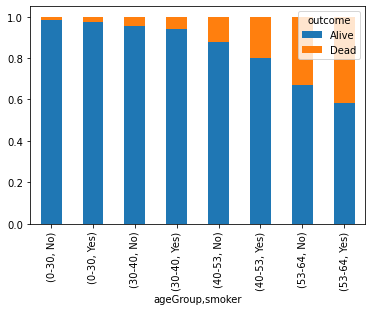

In [21]:
byage.unstack().plot(kind='bar',stacked=True)

In [22]:
byage.unstack()

outcome             Alive      Dead
ageGroup smoker                    
0-30     No      0.981818  0.018182
         Yes     0.975610  0.024390
30-40    No      0.955224  0.044776
         Yes     0.940678  0.059322
40-53    No      0.876106  0.123894
         Yes     0.802395  0.197605
53-64    No      0.669291  0.330709
         Yes     0.580645  0.419355

In [23]:
byage.unstack().drop("Dead",axis=1)

outcome             Alive
ageGroup smoker          
0-30     No      0.981818
         Yes     0.975610
30-40    No      0.955224
         Yes     0.940678
40-53    No      0.876106
         Yes     0.802395
53-64    No      0.669291
         Yes     0.580645

In [24]:
byage.unstack().drop("Dead",axis=1).unstack()

outcome      Alive          
smoker          No       Yes
ageGroup                    
0-30      0.981818  0.975610
30-40     0.955224  0.940678
40-53     0.876106  0.802395
53-64     0.669291  0.580645

In [25]:
byage2 = byage.unstack().drop("Dead",axis=1).unstack()

byage2.columns = ["No","Yes"]
byage2.columns.name = "smoker"

In [26]:
byage2

smoker,No,Yes
ageGroup,,
0-30,0.981818,0.975610
30-40,0.955224,0.940678
40-53,0.876106,0.802395
53-64,0.669291,0.580645


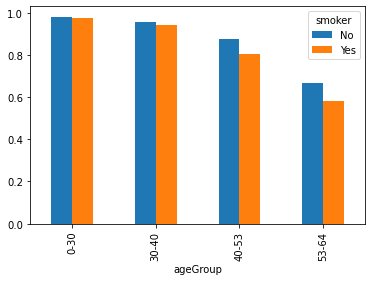

In [27]:
byage2.plot(kind='bar')